This program displays the anomalous December temperatures
for the NE United States from 2008 through 2019


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
# import geopandas as gpd

In [2]:
path='/shared/obs/gridded/GHCN_CAMS/'
file='air.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds
proj=ccrs.PlateCarree()


In [4]:
#  REVERSE OUR Latitudes
ds = ds.reindex(lat=list(reversed(ds['lat'])))

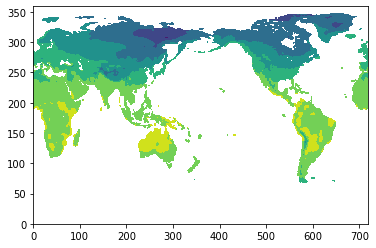

In [5]:
#  PLOT surface air temperature data for January, 1948
plt.contourf(ds['air'][0,:,:])

In [6]:
# Shift longitudes to run from -180 to +180
#ds=ds.assign_coords(lon=(((ds['lon']+180) % 360))-180)
#ds=ds.sortby(ds['lon'])


## Select region, U.S. Northeast, with times 1948 through 2019

ds_region=ds.sel(lon=slice(-120,-60),lat=slice(30,60),time=slice('1948-01-01', '2019-12-01'))
ds_region


In [7]:
# Slice time to match Nino34 data
#  for info, ds_precip=ds_precip.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))

ds_region=ds.sel(lon=slice(240,300),lat=slice(30,60),time=slice('1948-01-01', '2019-12-01')) 
ds_region


<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 864)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

In [8]:
# Find mean air temperature .
ds_regionm=ds_region.groupby('time.month').mean(dim='time')
ds_regionm




<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, month: 12)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [9]:
ds_regiongroup=ds_region.groupby('time.month')
ds_regiongroup

DatasetGroupBy, grouped over 'month' 
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [10]:
# Set up anomalous data:i.e. the difference between the current air temperature and the mean air temperature.
ds_anom = ds_region.groupby('time.month') - ds_regionm
ds_anom

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 864)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

## Plot average December temperature for time period 1948 to 2019

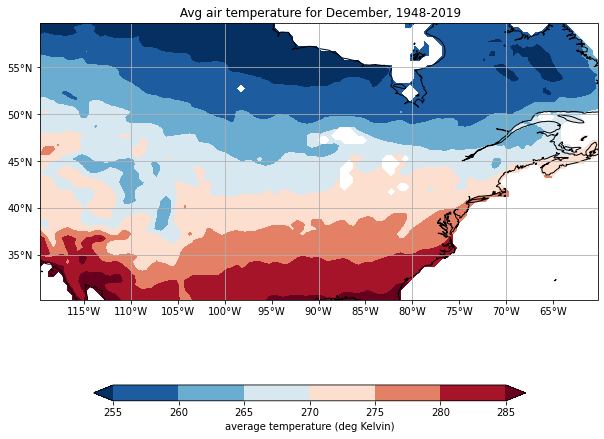

In [11]:
# set up subplot using plt. Just print one contour for average Dec. temps.

# alevels = np.arange (-10, 10, 1)
fig = plt.figure(figsize=(10,11))
#plt.contourf(ds_regionm['lon'],ds_regionm['lat'],ds_regionm['air'][11,:,:],cmap='RdBu_r')
#ax=plt.gca()
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
lon_formatter=cticker.LongitudeFormatter()
lat_formatter=cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks(np.arange(-120,-60, 5),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.set_yticks(np.arange(30,60,5),crs=ccrs.PlateCarree())

plt.title(' Avg air temperature for December, 1948-2019')
cs= ax.contourf(ds_regionm['lon'],ds_regionm['lat'], ds_regionm['air'][11,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both')
cbar_ax=fig.add_axes([0.2,0.2,0.6,0.02])
cbar = plt.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='average temperature (deg Kelvin)',)

plt.show()

## Read in North Atlantic Anomaly (nao) data
##

In [12]:
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(4).index,inplace=True)
df.drop(df.head(2).index,inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1950,0.56,0.01,-0.78,0.65,-0.50,0.25,-1.23,-0.19,0.39,1.43,-1.46,-1.03
1951,-0.42,0.35,-1.47,-0.38,-0.50,-1.35,1.39,-0.41,-1.18,2.54,-0.54,1.13
1952,0.57,-1.38,-1.97,0.95,-0.99,-0.10,-0.06,-0.49,-0.38,-0.28,-1.32,-0.49
1953,-0.12,-1.00,-0.45,-1.96,-0.56,1.41,0.43,-1.04,-0.19,1.95,0.96,-0.52
1954,-0.08,0.40,-1.27,1.31,-0.03,0.06,-0.57,-2.57,-0.28,1.16,0.29,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1.57,1.05,1.12,0.64,0.19,0.24,-3.14,-1.10,-0.49,0.99,1.70,1.99
2016,-0.37,1.35,0.37,0.26,-0.67,-0.13,-1.72,-2.24,0.74,0.96,-0.31,0.35
2017,0.05,0.69,0.37,1.74,-1.72,0.35,1.28,-1.53,-0.45,0.71,-0.14,0.73


In [13]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1950-1-01


### Check input data

In [14]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=840, freq='MS')

In [15]:
clim_index=df.T.unstack().values
clim_index= clim_index.astype(float)
clim_index

array([ 0.56,  0.01, -0.78,  0.65, -0.5 ,  0.25, -1.23, -0.19,  0.39,
        1.43, -1.46, -1.03, -0.42,  0.35, -1.47, -0.38, -0.5 , -1.35,
        1.39, -0.41, -1.18,  2.54, -0.54,  1.13,  0.57, -1.38, -1.97,
        0.95, -0.99, -0.1 , -0.06, -0.49, -0.38, -0.28, -1.32, -0.49,
       -0.12, -1.  , -0.45, -1.96, -0.56,  1.41,  0.43, -1.04, -0.19,
        1.95,  0.96, -0.52, -0.08,  0.4 , -1.27,  1.31, -0.03,  0.06,
       -0.57, -2.57, -0.28,  1.16,  0.29,  0.55, -2.65, -1.71, -0.96,
       -0.6 , -0.26, -0.8 ,  1.78,  1.25,  0.46, -1.09, -1.49,  0.07,
       -0.76, -1.71, -0.46, -1.3 ,  2.1 ,  0.41, -0.72, -1.89,  0.38,
        1.47,  0.4 ,  0.  ,  0.71, -0.32, -1.73,  0.39, -0.68, -0.42,
       -1.16, -0.83, -1.47,  1.95,  0.63,  0.02, -1.14, -1.64, -2.46,
        0.26, -0.17, -1.08, -1.69, -2.13,  0.08,  0.68,  1.59, -0.74,
       -1.52,  0.33, -0.56,  0.25,  0.41,  0.71,  0.77, -0.05,  1.  ,
        1.48,  0.3 ,  0.32, -2.01, -2.59, -0.93,  1.33,  0.47,  0.1 ,
        0.38, -1.93,

In [16]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 840)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    nao      (time) float64 0.56 0.01 -0.78 0.65 -0.5 ... -0.01 -1.03 0.16 1.02

### ds_index is our nao converted into an xarray Dataset
### Plot it out

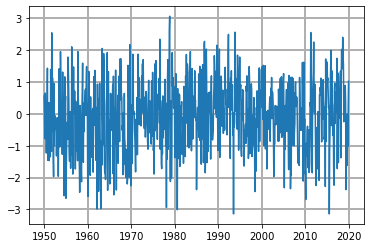

In [17]:
plt.plot(ds_index['time'],ds_index['nao'])
plt.grid(b=None, which='major', axis='both', linewidth='2')

### Match anomaly data time to nao time series

In [18]:
ds_anom=ds_anom.sel(time=slice(ds_index['time'][0],ds_index['time'][-1]))
ds_anom

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 840)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [19]:
ds_index=ds_index.sel(time=slice(ds_index['time'][0],ds_index['time'][839]))
ds_index

<xarray.Dataset>
Dimensions:  (time: 840)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    nao      (time) float64 0.56 0.01 -0.78 0.65 -0.5 ... -0.01 -1.03 0.16 1.02

### Check out a shortened time series from 1970 to 2019

Text(0.5, 1.0, ' North Atlantic Oscillation (nao)')

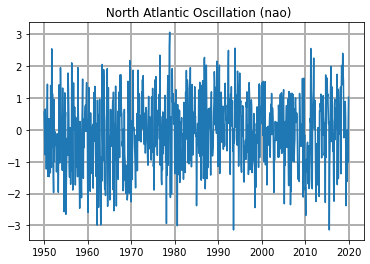

In [20]:
# Check shortened nao time sequence to December, 2019 from 2020 data.
plt.plot(ds_index['time'],ds_index['nao'])
plt.grid(b=None, which='major', axis='both', linewidth='2')
plt.title(' North Atlantic Oscillation (nao)')

Text(0.5, 1.0, ' North Atlantic Oscillation (nao)')

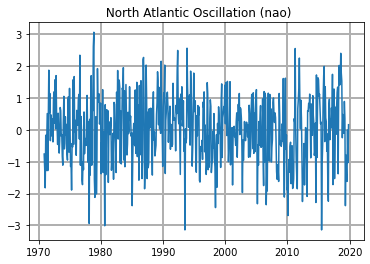

In [21]:
plt.plot(ds_index['time'][250:839],ds_index['nao'][250:839])
plt.grid(b=None, which='major', axis='both', linewidth='2')
plt.title(' North Atlantic Oscillation (nao)')

### pick a point located close to Washington DC 

In [22]:
pt=ds_anom.sel(lat=38.9,lon=360.0-77.0,method='nearest')
pt

<xarray.Dataset>
Dimensions:  (time: 840)
Coordinates:
    lat      float64 38.75
    lon      float32 283.25
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (time) float32 6.6812134 0.19711304 ... -1.7677917 1.4970398

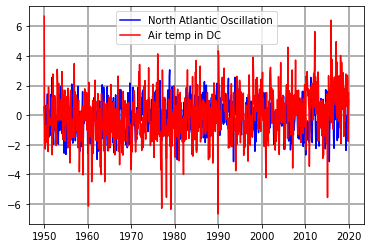

In [23]:
plt.plot(ds_index['time'],ds_index['nao'],'b')
plt.plot(pt['time'],pt['air'],'r')
plt.grid(b=None, which='major', axis='both', linewidth='2')
plt.legend(['North Atlantic Oscillation','Air temp in DC'])

In [24]:
R=np.corrcoef(ds_index['nao'].values,pt['air'].values)
R

array([[1.        , 0.23665552],
       [0.23665552, 1.        ]])


### Calculate Correlation
### Calculate using the xarry.corr function 

### Try with a convert nao data to floating point data from string data.

In [25]:
nx = len(ds_index['nao'])
nx

840

In [26]:

for i in range(nx):
    ds_index['nao'][i]=float(ds_index['nao'][i])
ds_index

<xarray.Dataset>
Dimensions:  (time: 840)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    nao      (time) float64 0.56 0.01 -0.78 0.65 -0.5 ... -0.01 -1.03 0.16 1.02

In [27]:
## Calculate using the numpy function corrcoefalculate using 

In [28]:
R=np.corrcoef(ds_index['nao'],pt['air'])
R

array([[1.        , 0.23665552],
       [0.23665552, 1.        ]])

In [29]:
r_map=xr.corr(ds_index['nao'],ds_anom['air'],dim='time')
r_map

<xarray.DataArray (lat: 60, lon: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.09620873, 0.10027591, 0.09307621, ...,        nan,        nan,
               nan],
       [0.08841943, 0.08968779, 0.08450742, ...,        nan,        nan,
               nan],
       [0.08445946, 0.08382916, 0.08293857, ...,        nan,        nan,
               nan]])
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75